In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


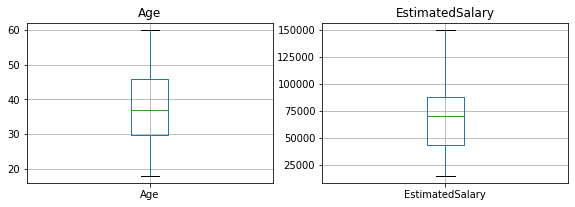

In [3]:
plt.figure(figsize = (15, 10))
cols=["Age", "EstimatedSalary"]
for i in range(1, len(cols)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = [cols[i-1]])
    fig.set_title(cols[i-1])


In [4]:
x = df.drop("Purchased", axis = 1)
y = df["Purchased"]

In [5]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

In [7]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
y_pred = gnb.predict(xtest)

y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, y_pred)))

Model accuracy score: 0.8600
